# Lung and Colon cancer detection

Mount drive for google cloud training

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Model
import zipfile

# Preprocessing

Loading data set

In [3]:
#Code for google colab
#with zipfile.ZipFile("/content/drive/My Drive/archive.zip", 'r') as zip_ref:
 #   zip_ref.extractall('/content/lung_colon_images')

file_paths_lung = []
labels_lung = []

file_paths_colon = []
labels_colon = []

lung_file_path = 'input_files/lung_colon_image_set/lung_image_sets'
colon_file_path = 'input_files/lung_colon_image_set/colon_image_sets'

#for google colab
#lung_file_path = '/content/lung_colon_images/lung_colon_image_set/lung_image_sets'
#colon_file_path = '/content/lung_colon_images/lung_colon_image_set/colon_image_sets'

lung_types = os.listdir(lung_file_path)
colon_types = os.listdir(colon_file_path)

for lung_type in lung_types:
    folder_path = os.path.join(lung_file_path, lung_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)

        file_paths_lung.append(file_path)
        labels_lung.append(lung_type)

for colon_type in colon_types:
    folder_path = os.path.join(colon_file_path, colon_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)

        file_paths_colon.append(file_path)
        labels_colon.append(colon_type)


lung_data_frame = pd.concat([pd.Series(file_paths_lung, name="paths"), pd.Series(labels_lung, name="labels")], axis=1)
colon_data_frame = pd.concat([pd.Series(file_paths_colon, name="paths"), pd.Series(labels_colon, name="labels")], axis=1)

print(lung_data_frame)


                                                   paths    labels
0      /content/lung_colon_images/lung_colon_image_se...    lung_n
1      /content/lung_colon_images/lung_colon_image_se...    lung_n
2      /content/lung_colon_images/lung_colon_image_se...    lung_n
3      /content/lung_colon_images/lung_colon_image_se...    lung_n
4      /content/lung_colon_images/lung_colon_image_se...    lung_n
...                                                  ...       ...
14995  /content/lung_colon_images/lung_colon_image_se...  lung_aca
14996  /content/lung_colon_images/lung_colon_image_se...  lung_aca
14997  /content/lung_colon_images/lung_colon_image_se...  lung_aca
14998  /content/lung_colon_images/lung_colon_image_se...  lung_aca
14999  /content/lung_colon_images/lung_colon_image_se...  lung_aca

[15000 rows x 2 columns]


 Is data set balanced?

On pie chart we can see that lung data set is balanced. All 3 classes are 33.3% of data set.

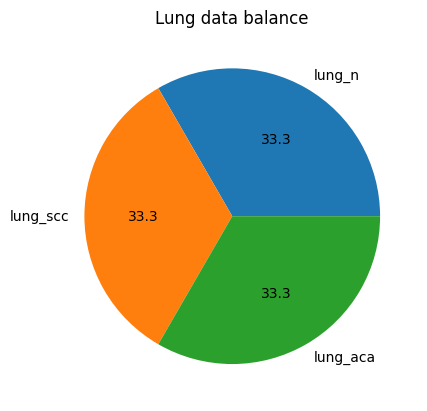

In [4]:
plt.pie(lung_data_frame.labels.value_counts(), labels = lung_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Lung data balance")
plt.show()

On pie chart we can see that colon data set is balanced. Both classes are 50% of data set.

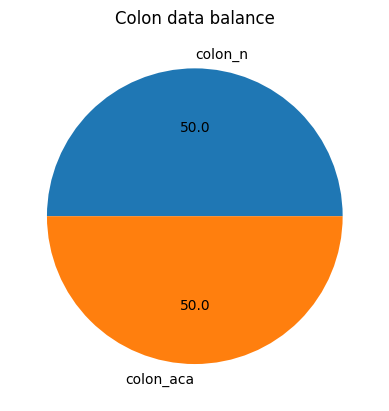

In [5]:
plt.pie(colon_data_frame.labels.value_counts(), labels = colon_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Colon data balance")
plt.show()

Splitting data in 3 groups: train, test and valid

In [6]:
train_df_lung, rest_lung = train_test_split(lung_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_lung, test_df_lung = train_test_split(rest_lung, train_size=0.5, shuffle=True, random_state=123)

In [7]:
train_df_colon, rest_colon = train_test_split(colon_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_colon, test_df_colon = train_test_split(rest_colon, train_size=0.5, shuffle=True, random_state=123)

Image data generator

In [8]:
batch_size = 32
img_size = (224, 224)

tr_gen_lung = ImageDataGenerator(rescale=1./255)
ts_gen_lung = ImageDataGenerator(rescale=1./255)
val_gen_lung = ImageDataGenerator(rescale=1./255)

train_gen_lung = tr_gen_lung.flow_from_dataframe(
    train_df_lung,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_lung = val_gen_lung.flow_from_dataframe(
    valid_df_lung,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_lung = ts_gen_lung.flow_from_dataframe(
    test_df_lung,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 10500 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


In [9]:
tr_gen_colon = ImageDataGenerator(rescale=1./255)
ts_gen_colon = ImageDataGenerator(rescale=1./255)
val_gen_colon = ImageDataGenerator(rescale=1./255)

train_gen_colon = tr_gen_colon.flow_from_dataframe(
    train_df_colon,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_colon = val_gen_colon.flow_from_dataframe(
    valid_df_colon,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_colon = ts_gen_colon.flow_from_dataframe(
    test_df_colon,
    x_col= 'paths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 7000 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.


To check if the images are processed well, we will display 16 images of both data sets (half of batch_size).

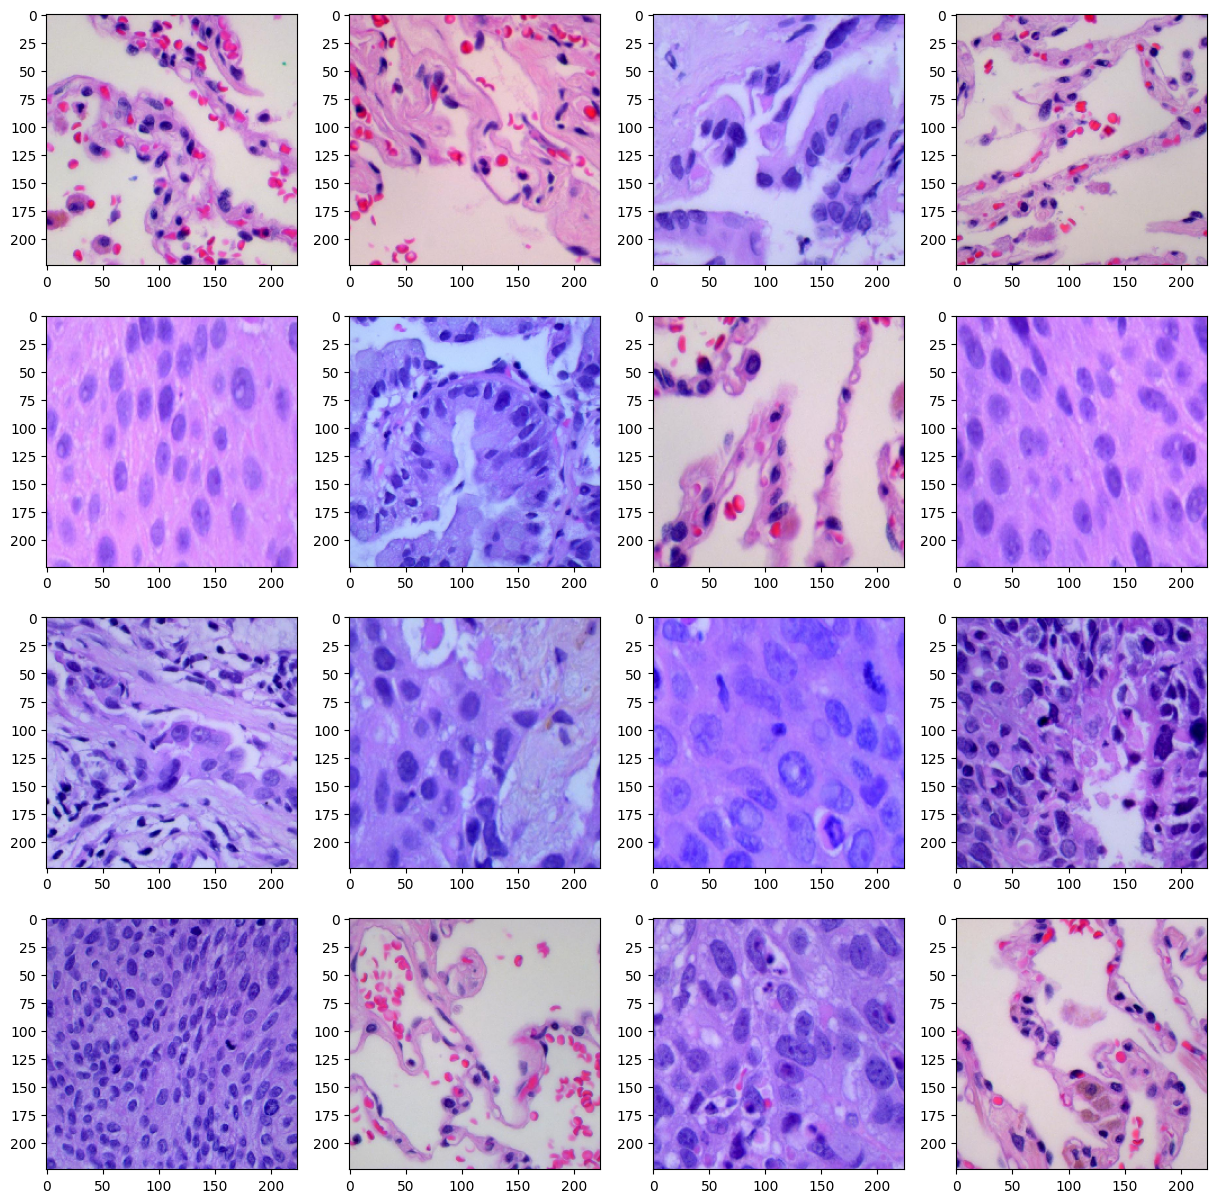

In [ ]:
images, labels = next(train_gen_lung)

plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

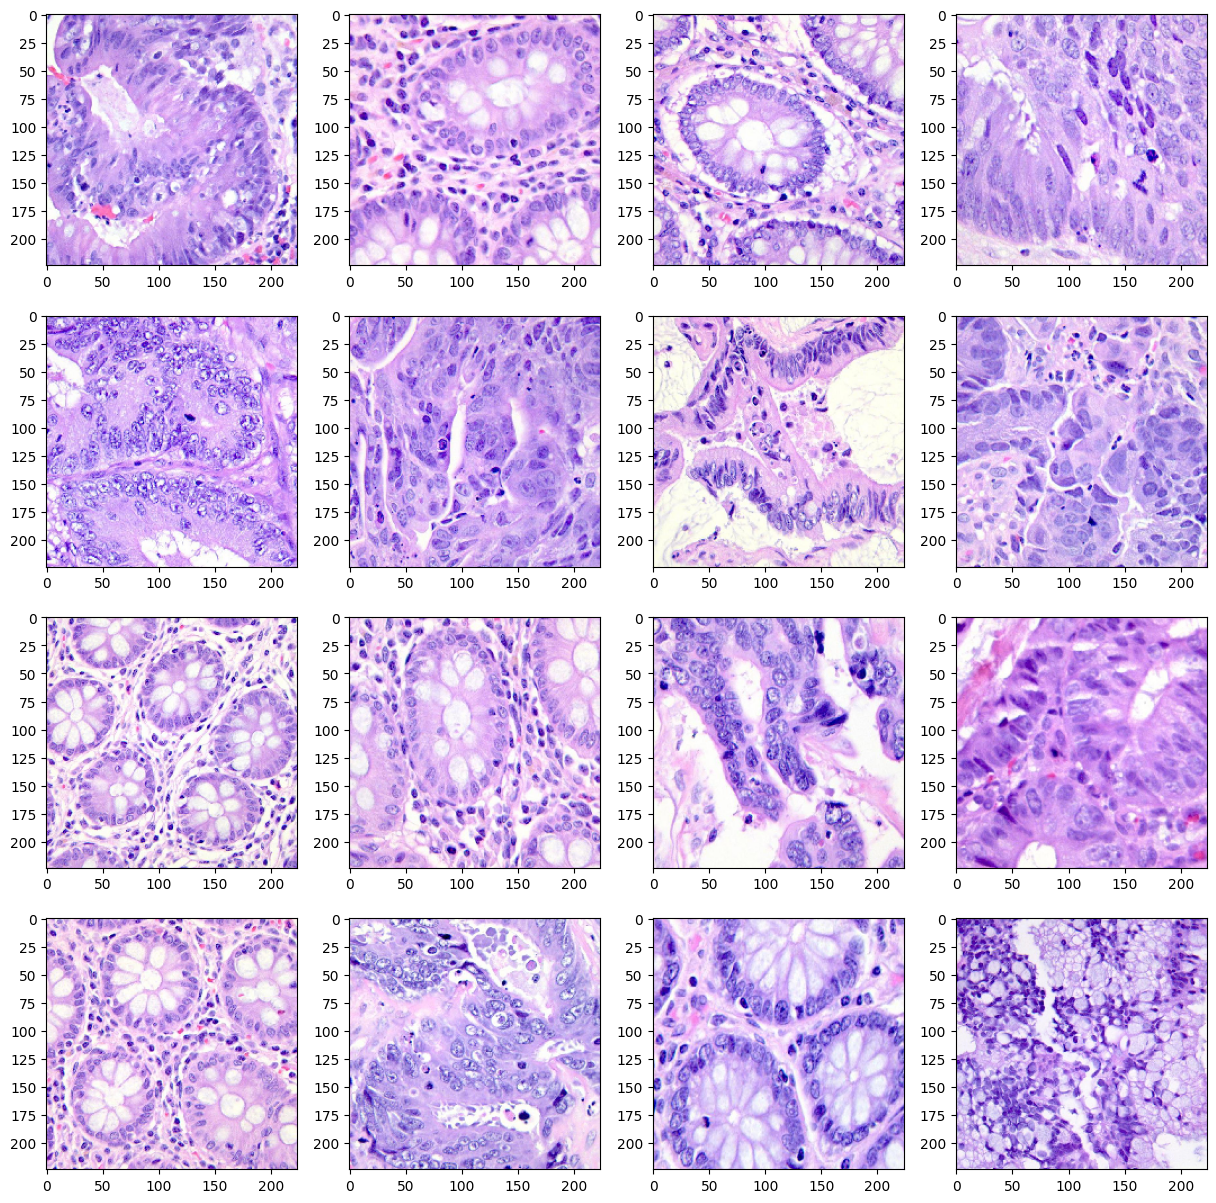

In [ ]:
images, labels = next(train_gen_colon)

plt.figure(figsize= (15, 15))

for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

# Models

# CNN model for Lung cancer detection

Creating model, adding layers and compiling model.

In [10]:
model_lung = Sequential()

model_lung.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model_lung.add(BatchNormalization())
model_lung.add(MaxPooling2D((2,2)))

model_lung.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model_lung.add(BatchNormalization())
model_lung.add(MaxPooling2D((2,2)))

model_lung.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model_lung.add(BatchNormalization())
model_lung.add(MaxPooling2D((2,2)))

model_lung.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model_lung.add(BatchNormalization())
model_lung.add(MaxPooling2D((2,2)))

model_lung.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model_lung.add(BatchNormalization())
model_lung.add(MaxPooling2D((2,2)))

model_lung.add(Flatten())

model_lung.add(Dense(256, activation='relu'))
model_lung.add(Dropout(0.5))

model_lung.add(Dense(128, activation='relu'))
model_lung.add(Dropout(0.3))

model_lung.add(Dense(64, activation='relu'))
model_lung.add(Dropout(0.2))

model_lung.add(Dense(len(list(train_gen_lung.class_indices.keys())), activation='softmax'))



model_lung.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_lung.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                        

Setting epochs and training model

In [11]:
epochs = 20
history_lung = model_lung.fit(train_gen_lung, epochs=epochs, verbose=1,validation_data=valid_gen_lung)

Epoch 1/20
329/329 [==============================] - 71s 185ms/step - loss: 0.8577 - accuracy: 0.8097 - val_loss: 8.7142 - val_accuracy: 0.3493
Epoch 2/20
329/329 [==============================] - 58s 175ms/step - loss: 0.3478 - accuracy: 0.8811 - val_loss: 0.2551 - val_accuracy: 0.9058
Epoch 3/20
329/329 [==============================] - 58s 176ms/step - loss: 0.2654 - accuracy: 0.9138 - val_loss: 0.1874 - val_accuracy: 0.9440
Epoch 4/20
329/329 [==============================] - 58s 175ms/step - loss: 0.2218 - accuracy: 0.9220 - val_loss: 0.1232 - val_accuracy: 0.9520
Epoch 5/20
329/329 [==============================] - 58s 177ms/step - loss: 0.1899 - accuracy: 0.9342 - val_loss: 0.1087 - val_accuracy: 0.9591
Epoch 6/20
329/329 [==============================] - 58s 177ms/step - loss: 0.1690 - accuracy: 0.9422 - val_loss: 0.0812 - val_accuracy: 0.9724
Epoch 7/20
329/329 [==============================] - 59s 179ms/step - loss: 0.1500 - accuracy: 0.9528 - val_loss: 0.0938 - val_ac

We made function for printing performance of model training which will be used for all the models in the future.

In [13]:
def print_performance(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    best_epoch_loss = val_loss.index(min(val_loss)) + 1
    best_epoch_acc = val_acc.index(max(val_acc)) + 1

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.plot(best_epoch_loss, val_loss[best_epoch_loss-1], 'go', label='Best Epoch (Val Loss)')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.plot(best_epoch_acc, val_acc[best_epoch_acc-1], 'go', label='Best Epoch (Val Accuracy)')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()



Printing performance of the model we just trained and displaying best epoch.

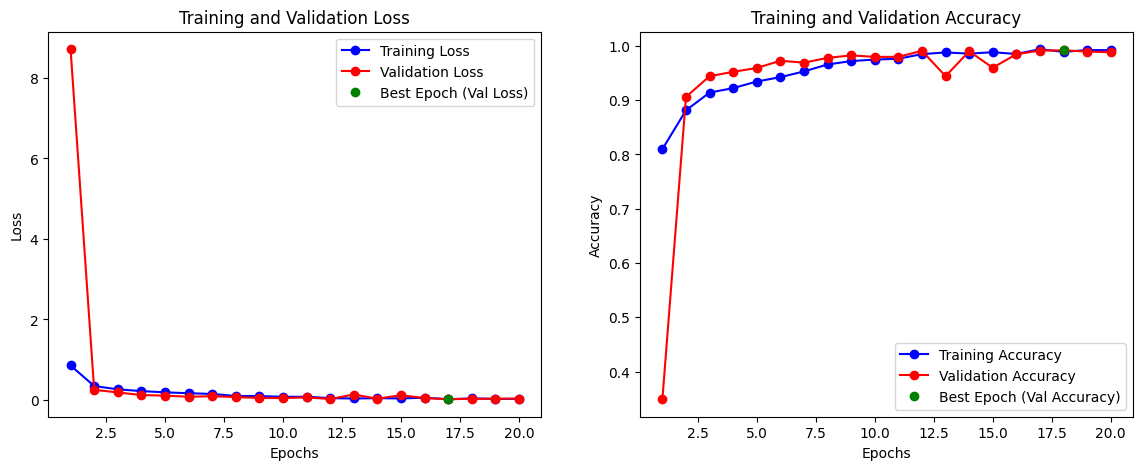

In [14]:
print_performance(history_lung)

We created a function to print evaluation of the model. We will use this function for every model in the future.

In [15]:
def print_evaluation(model, train_gen, valid_gen, test_gen):
    train_score = model.evaluate(train_gen, verbose= 1)
    valid_score = model.evaluate(valid_gen, verbose= 1)
    test_score = model.evaluate(test_gen, verbose= 1)

    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])


Printing evaluation for the model we just trained. We can see loss and accuracy of train, validation and test.

In [16]:
print_evaluation(model_lung, train_gen_lung, valid_gen_lung, test_gen_lung)

71/71 [==============================] - 8s 115ms/step - loss: 0.0378 - accuracy: 0.9880
Train Loss:  0.00902328547090292
Train Accuracy:  0.9971428513526917
--------------------
Validation Loss:  0.03622337803244591
Validation Accuracy:  0.9879999756813049
--------------------
Test Loss:  0.037825074046850204
Test Accuracy:  0.9879999756813049


We created function to display the confusion matrix that we will use for every model in the future.

In [17]:
def print_confusion_matrix(model, test_gen):
    y_pred = np.argmax(model.predict(test_gen), axis=1)
    cm = confusion_matrix(test_gen.classes, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()




Displaying the confusion matrix of the model we just trained.

71/71 [==============================] - 9s 131ms/step


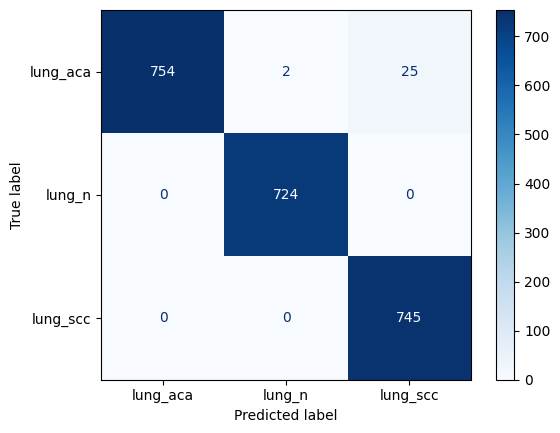

In [18]:
print_confusion_matrix(model_lung, test_gen_lung)

Printing the classification report for the model we just trained. Here we can see f1 score.

In [19]:
print(classification_report(test_gen_lung.classes, np.argmax(model_lung.predict(test_gen_lung), axis=1), target_names= list(test_gen_lung.class_indices.keys())))

71/71 [==============================] - 8s 116ms/step
              precision    recall  f1-score   support

    lung_aca       1.00      0.97      0.98       781
      lung_n       1.00      1.00      1.00       724
    lung_scc       0.97      1.00      0.98       745

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


# CNN model for Colon cancer detection

Creating the model, setting the layers and compiling it.

In [ ]:
model_colon = Sequential()

model_colon.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

model_colon.add(Conv2D(64, (3, 3), activation='relu'))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

model_colon.add(Conv2D(128, (3, 3), activation='relu'))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

model_colon.add(Flatten())

model_colon.add(Dense(128, activation='relu'))
model_colon.add(Dropout(0.5))

model_colon.add(Dense(2, activation='softmax'))

model_colon.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_colon.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                      

Setting epochs and training model.

In [ ]:
epochs = 20
history_colon = model_colon.fit(train_gen_colon, epochs= epochs, verbose= 1, validation_data= valid_gen_colon)

Epoch 1/20
219/219 [==============================] - 51s 218ms/step - loss: 0.9664 - accuracy: 0.8949 - val_loss: 12.9580 - val_accuracy: 0.5133
Epoch 2/20
219/219 [==============================] - 41s 188ms/step - loss: 0.1624 - accuracy: 0.9624 - val_loss: 0.3758 - val_accuracy: 0.8773
Epoch 3/20
219/219 [==============================] - 41s 185ms/step - loss: 0.1198 - accuracy: 0.9714 - val_loss: 0.2028 - val_accuracy: 0.9413
Epoch 4/20
219/219 [==============================] - 42s 190ms/step - loss: 0.0532 - accuracy: 0.9827 - val_loss: 0.1605 - val_accuracy: 0.9693
Epoch 5/20
219/219 [==============================] - 43s 197ms/step - loss: 0.0507 - accuracy: 0.9857 - val_loss: 0.1860 - val_accuracy: 0.9733
Epoch 6/20
219/219 [==============================] - 41s 185ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.1298 - val_accuracy: 0.9773
Epoch 7/20
219/219 [==============================] - 42s 193ms/step - loss: 0.0622 - accuracy: 0.9837 - val_loss: 0.2609 - val_a

Using function we created before we print performance of the model we just created and showing the best epoch.

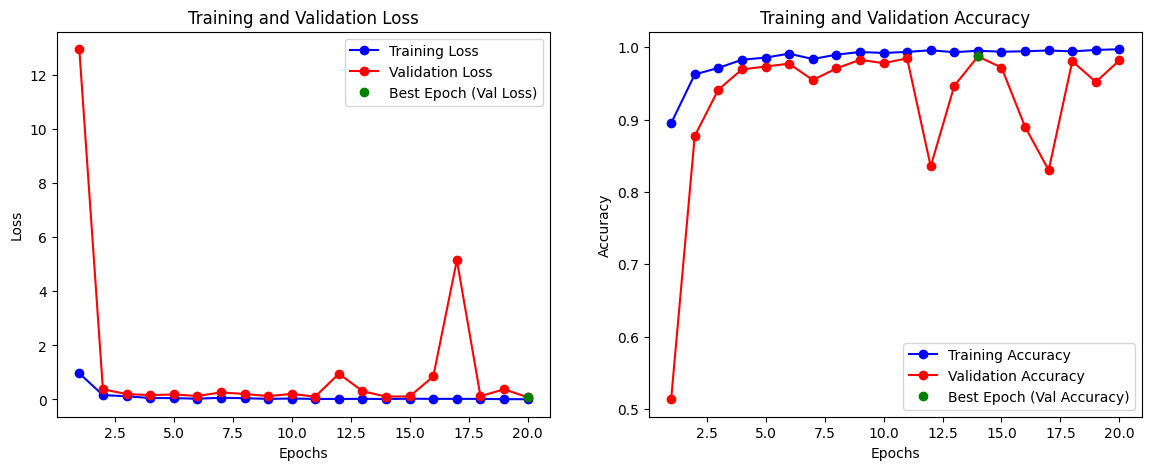

In [ ]:
print_performance(history_colon)

Using the function we created before to print the evaluation of the model we just trained.

In [ ]:
print_evaluation(model_colon, train_gen_colon, valid_gen_colon, test_gen_colon)

47/47 [==============================] - 8s 170ms/step - loss: 0.0552 - accuracy: 0.9827
Train Loss:  0.0020703033078461885
Train Accuracy:  0.9997143149375916
--------------------
Validation Loss:  0.08223733305931091
Validation Accuracy:  0.9819999933242798
--------------------
Test Loss:  0.05517803505063057
Test Accuracy:  0.9826666712760925


Confusion matrix of the model we just trained.

47/47 [==============================] - 14s 285ms/step


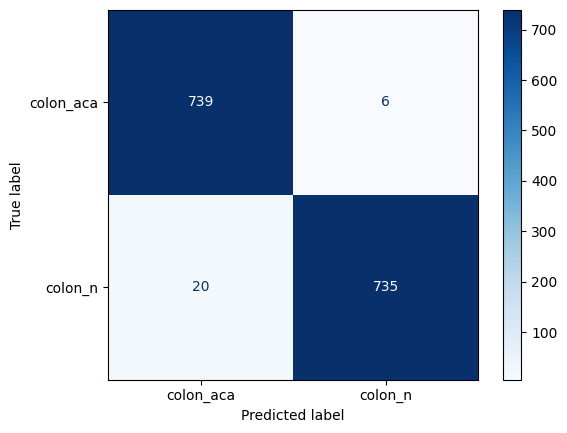

In [ ]:
print_confusion_matrix(model_colon, test_gen_colon)

Classification report of the model we just trained with f1 score

In [ ]:
print(classification_report(test_gen_colon.classes, np.argmax(model_colon.predict(test_gen_colon), axis=1), target_names= list(test_gen_colon.class_indices.keys())))

47/47 [==============================] - 6s 124ms/step
              precision    recall  f1-score   support

   colon_aca       0.97      0.99      0.98       745
     colon_n       0.99      0.97      0.98       755

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


# Fine-tuning pretrained models EfficientNetB3 and ResNetV2

# Fine-tuning EfficientNetB3 for Lung cancer detection 

Adding new layers on top of EfficientNetB3 model.

In [ ]:
base_model_lung = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='none')
x = base_model_lung.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(list(train_gen_lung.class_indices.keys())), activation='softmax')(x)

43941136/43941136 [==============================] - 2s 0us/step


In [ ]:
EfficientNetB3_model_lung = Model(inputs = base_model_lung.input, outputs = predictions)

In [ ]:
EfficientNetB3_model_lung.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
EfficientNetB3_model_lung.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

Training model

In [ ]:
EfficientNetB3_model_lung_history = EfficientNetB3_model_lung.fit(train_gen_lung, epochs = 20, verbose = 1, validation_data = valid_gen_lung)

Epoch 1/20
329/329 [==============================] - 236s 549ms/step - loss: 0.7223 - accuracy: 0.7293 - val_loss: 1.8953 - val_accuracy: 0.3160
Epoch 2/20
329/329 [==============================] - 173s 525ms/step - loss: 0.3162 - accuracy: 0.8828 - val_loss: 0.3893 - val_accuracy: 0.8693
Epoch 3/20
329/329 [==============================] - 175s 530ms/step - loss: 0.2201 - accuracy: 0.9219 - val_loss: 0.4062 - val_accuracy: 0.8502
Epoch 4/20
329/329 [==============================] - 172s 524ms/step - loss: 0.1579 - accuracy: 0.9432 - val_loss: 0.7736 - val_accuracy: 0.7751
Epoch 5/20
329/329 [==============================] - 173s 526ms/step - loss: 0.1148 - accuracy: 0.9602 - val_loss: 0.0499 - val_accuracy: 0.9818
Epoch 6/20
329/329 [==============================] - 173s 526ms/step - loss: 0.0988 - accuracy: 0.9657 - val_loss: 0.0752 - val_accuracy: 0.9742
Epoch 7/20
329/329 [==============================] - 183s 556ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.0842 -

Performance of the model we just trained

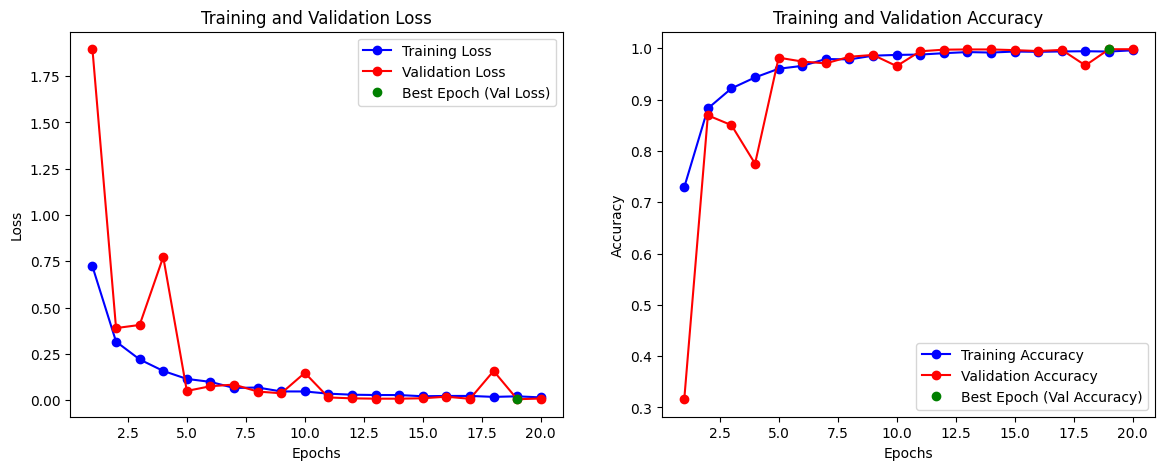

In [ ]:
print_performance(EfficientNetB3_model_lung_history)

Evaluation of our model

In [ ]:
print_evaluation(EfficientNetB3_model_lung, train_gen_lung, valid_gen_lung, test_gen_lung)

71/71 [==============================] - 11s 151ms/step - loss: 0.0098 - accuracy: 0.9973
Train Loss:  0.0001373960403725505
Train Accuracy:  0.9999047517776489
--------------------
Validation Loss:  0.008820482529699802
Validation Accuracy:  0.9982222318649292
--------------------
Test Loss:  0.009797533042728901
Test Accuracy:  0.9973333477973938


Confusion matrix of EfficientNerB3_model_lung model.

71/71 [==============================] - 14s 147ms/step


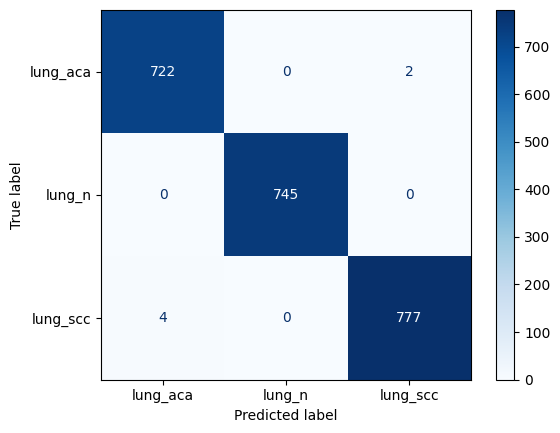

In [ ]:
print_confusion_matrix(EfficientNetB3_model_lung, test_gen_lung)

Classification report with f1 score.

In [ ]:
print(classification_report(test_gen_lung.classes, np.argmax(EfficientNetB3_model_lung.predict(test_gen_lung), axis=1), target_names= list(test_gen_lung.class_indices.keys())))

71/71 [==============================] - 12s 172ms/step
              precision    recall  f1-score   support

    lung_aca       0.99      1.00      1.00       724
      lung_n       1.00      1.00      1.00       745
    lung_scc       1.00      0.99      1.00       781

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250


# Fine-tuning ResNet50V2 model for Lung cancer detection

Creating base of our model.

In [ ]:
ResNet50_model_lung_base = ResNet50V2(input_shape=(224, 224, 3), weights ='imagenet', include_top=False)

Here we froze all layers in ResNet50V2 model, so we don't change their weights while training our model.

In [ ]:
for layer in ResNet50_model_lung_base.layers:
  layer.trainable = False

Adding layers on our ResNet base.

In [ ]:
x = ResNet50_model_lung_base.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(list(train_gen_lung.class_indices.keys())), activation='softmax')(x)

In [ ]:
ResNet50_model_lung = Model(inputs = ResNet50_model_lung_base.input, outputs = predictions)
ResNet50_model_lung.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

Training model for 20 epochs.

In [ ]:
ResNet50_model_lung.compile(optimizer = Adamax(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])
ResNet50_model_lung_history = ResNet50_model_lung.fit(train_gen_lung, epochs = 20, verbose = 1, validation_data = valid_gen_lung)

Epoch 1/20
329/329 [==============================] - 72s 202ms/step - loss: 0.3421 - accuracy: 0.8755 - val_loss: 0.2270 - val_accuracy: 0.9360
Epoch 2/20
329/329 [==============================] - 61s 187ms/step - loss: 0.1735 - accuracy: 0.9375 - val_loss: 0.1462 - val_accuracy: 0.9493
Epoch 3/20
329/329 [==============================] - 62s 188ms/step - loss: 0.1356 - accuracy: 0.9507 - val_loss: 0.1191 - val_accuracy: 0.9609
Epoch 4/20
329/329 [==============================] - 72s 217ms/step - loss: 0.1086 - accuracy: 0.9630 - val_loss: 0.1036 - val_accuracy: 0.9644
Epoch 5/20
329/329 [==============================] - 64s 194ms/step - loss: 0.0968 - accuracy: 0.9658 - val_loss: 0.0933 - val_accuracy: 0.9676
Epoch 6/20
329/329 [==============================] - 61s 186ms/step - loss: 0.0839 - accuracy: 0.9693 - val_loss: 0.0836 - val_accuracy: 0.9716
Epoch 7/20
329/329 [==============================] - 63s 191ms/step - loss: 0.0723 - accuracy: 0.9759 - val_loss: 0.0770 - val_ac

Printing performance of the model and displaying the best epoch.

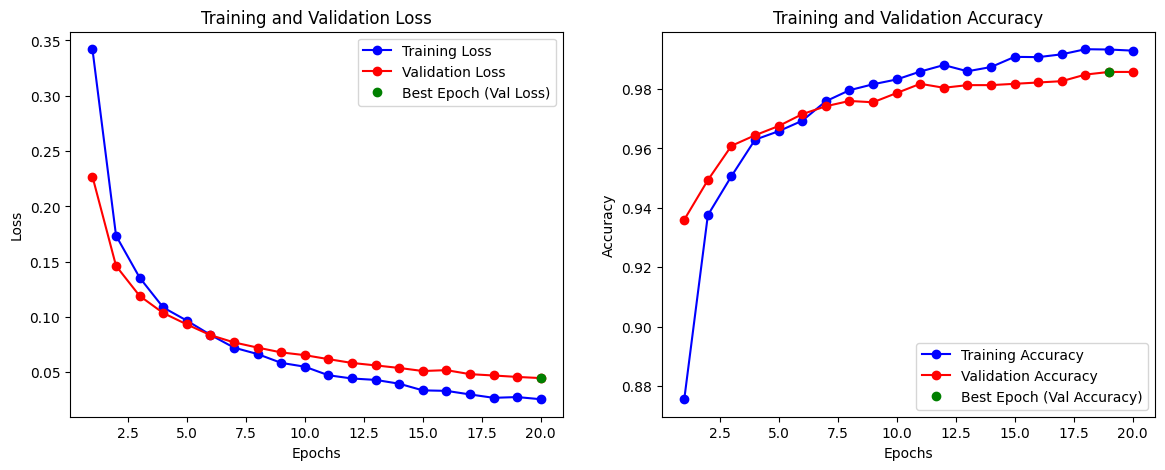

In [ ]:
print_performance(ResNet50_model_lung_history)

Evaluation of the model we just trained:

In [ ]:
print_evaluation(ResNet50_model_lung, train_gen_lung, valid_gen_lung, test_gen_lung)

71/71 [==============================] - 12s 164ms/step - loss: 0.0487 - accuracy: 0.9840
Train Loss:  0.013593357987701893
Train Accuracy:  0.9987618923187256
--------------------
Validation Loss:  0.04479595273733139
Validation Accuracy:  0.9857777953147888
--------------------
Test Loss:  0.048652783036231995
Test Accuracy:  0.984000027179718


Confusion matrix of the ResNet50_model_lung model.

71/71 [==============================] - 12s 162ms/step


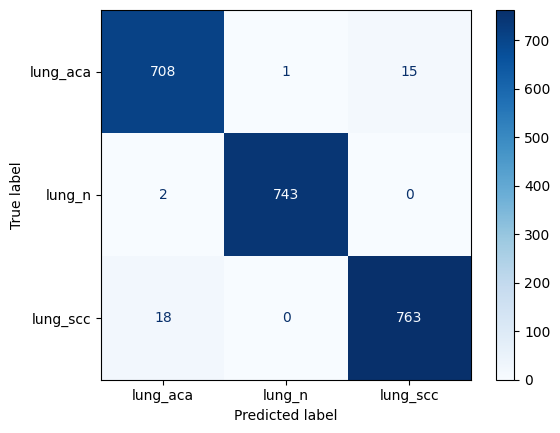

In [ ]:
print_confusion_matrix(ResNet50_model_lung, test_gen_lung)

Printing classification report for the model we just trained.

In [ ]:
print(classification_report(test_gen_lung.classes, np.argmax(ResNet50_model_lung.predict(test_gen_lung), axis=1), target_names= list(test_gen_lung.class_indices.keys())))

71/71 [==============================] - 11s 159ms/step
              precision    recall  f1-score   support

    lung_aca       0.97      0.98      0.98       724
      lung_n       1.00      1.00      1.00       745
    lung_scc       0.98      0.98      0.98       781

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250


# Fine-tuning EfficientNetB3 model for detecting Colon cancer

Adding layers on EfficientNetB3 model as a base.

In [ ]:
base_model_colon = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='none')
x = base_model_colon.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(list(train_gen_colon.class_indices.keys())), activation='softmax')(x)

In [ ]:
EfficientNetB3_model_colon = Model(inputs = base_model_colon.input, outputs = predictions)

In [ ]:
EfficientNetB3_model_colon.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
EfficientNetB3_model_colon.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

Training EfficientNetB3_model_colon model for 20 epochs.

In [ ]:
EfficientNetB3_model_colon_history = EfficientNetB3_model_colon.fit(train_gen_colon, epochs = 20, verbose = 1, validation_data = valid_gen_colon)

Epoch 1/20
219/219 [==============================] - 183s 572ms/step - loss: 0.1967 - accuracy: 0.9210 - val_loss: 0.8285 - val_accuracy: 0.5133
Epoch 2/20
219/219 [==============================] - 121s 554ms/step - loss: 0.0434 - accuracy: 0.9854 - val_loss: 1.2019 - val_accuracy: 0.5347
Epoch 3/20
219/219 [==============================] - 118s 538ms/step - loss: 0.0221 - accuracy: 0.9917 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 4/20
219/219 [==============================] - 119s 543ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0092 - val_accuracy: 0.9973
Epoch 5/20
219/219 [==============================] - 118s 540ms/step - loss: 0.0113 - accuracy: 0.9957 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 6/20
219/219 [==============================] - 119s 543ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/20
219/219 [==============================] - 119s 541ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0120 -

Printing performance of the model we just trained and displaying the best epoch.

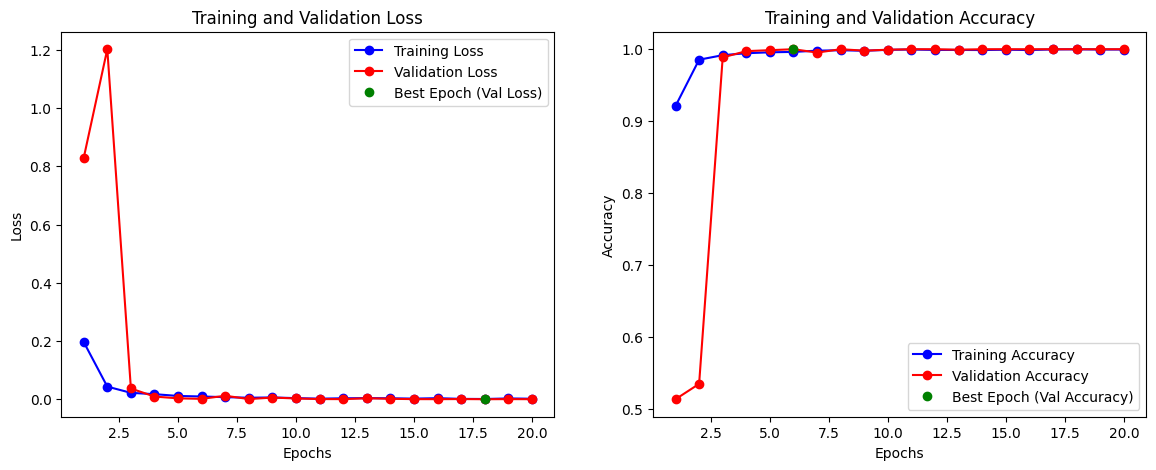

In [ ]:
print_performance(EfficientNetB3_model_colon_history)

Printing evaluation for our model.

In [ ]:
print_evaluation(EfficientNetB3_model_colon, train_gen_colon, valid_gen_colon, test_gen_colon)

47/47 [==============================] - 8s 166ms/step - loss: 1.0139e-04 - accuracy: 1.0000
Train Loss:  9.839958693191875e-06
Train Accuracy:  1.0
--------------------
Validation Loss:  0.00021336652571335435
Validation Accuracy:  1.0
--------------------
Test Loss:  0.00010139190999325365
Test Accuracy:  1.0


Confusion matrix of EfficientNetB3_model_colon model.

47/47 [==============================] - 13s 156ms/step


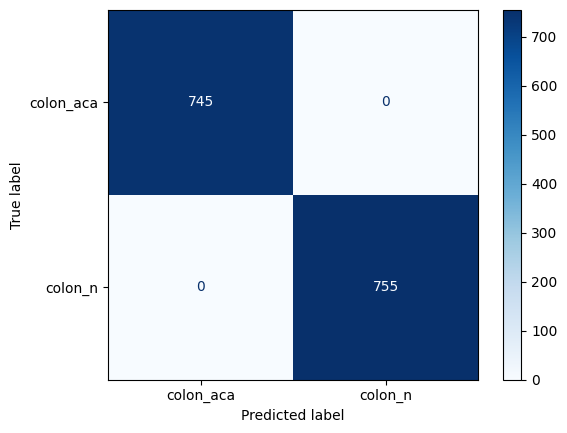

In [ ]:
print_confusion_matrix(EfficientNetB3_model_colon, test_gen_colon)

Printing classification report for our model and showing f1 score.

In [ ]:
print(classification_report(test_gen_colon.classes, np.argmax(EfficientNetB3_model_colon.predict(test_gen_colon), axis=1), target_names= list(test_gen_colon.class_indices.keys())))

47/47 [==============================] - 11s 222ms/step
              precision    recall  f1-score   support

   colon_aca       1.00      1.00      1.00       745
     colon_n       1.00      1.00      1.00       755

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


# ResNet50V2 Colon cancer detection

In [ ]:
ResNet50_model_colon_base = ResNet50V2(input_shape=(224, 224, 3), weights ='imagenet', include_top=False)

94668760/94668760 [==============================] - 0s 0us/step


Freezing layers and adding new layers on our ResNet50V2 model as a base

In [ ]:
for layer in ResNet50_model_colon_base.layers:
  layer.trainable = False

x = ResNet50_model_colon_base.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(list(train_gen_colon.class_indices.keys())), activation='softmax')(x)

In [ ]:
ResNet50_model_colon = Model(inputs = ResNet50_model_colon_base.input, outputs = predictions)
ResNet50_model_colon.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

Training ResNet_50_model_colon for 20 epochs.

In [ ]:
ResNet50_model_colon.compile(optimizer = Adamax(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])
ResNet50_model_colon_history = ResNet50_model_colon.fit(train_gen_colon, epochs = 20, verbose = 1, validation_data = valid_gen_colon)

Epoch 1/20
219/219 [==============================] - 52s 218ms/step - loss: 0.1750 - accuracy: 0.9367 - val_loss: 0.1144 - val_accuracy: 0.9760
Epoch 2/20
219/219 [==============================] - 43s 195ms/step - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.0635 - val_accuracy: 0.9833
Epoch 3/20
219/219 [==============================] - 44s 199ms/step - loss: 0.0501 - accuracy: 0.9863 - val_loss: 0.0471 - val_accuracy: 0.9833
Epoch 4/20
219/219 [==============================] - 42s 189ms/step - loss: 0.0409 - accuracy: 0.9887 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 5/20
219/219 [==============================] - 42s 192ms/step - loss: 0.0353 - accuracy: 0.9904 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 6/20
219/219 [==============================] - 41s 186ms/step - loss: 0.0293 - accuracy: 0.9930 - val_loss: 0.0288 - val_accuracy: 0.9913
Epoch 7/20
219/219 [==============================] - 44s 201ms/step - loss: 0.0226 - accuracy: 0.9944 - val_loss: 0.0259 - val_ac

Printing performance of the model we just trained and displaying the best epoch.

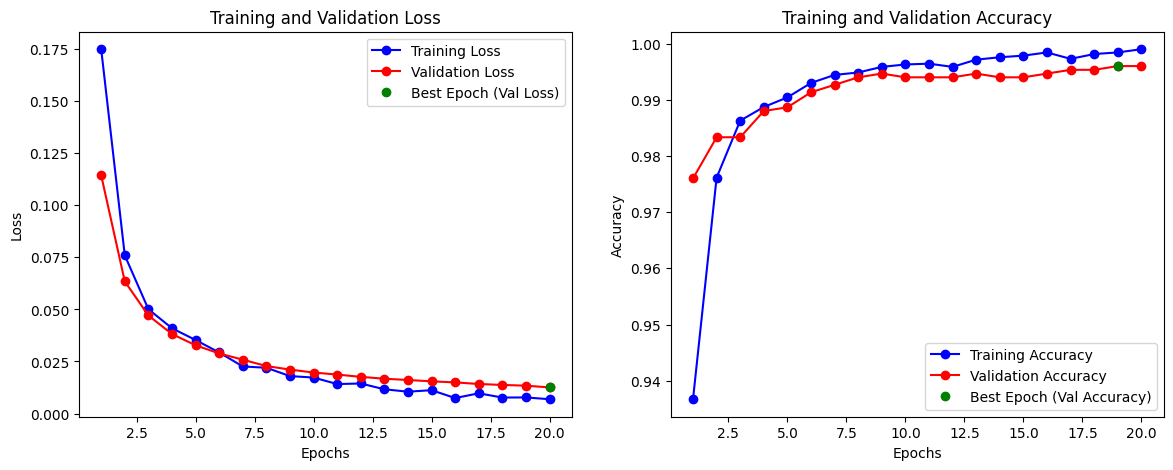

In [ ]:
print_performance(ResNet50_model_colon_history)

Printing evaluation of our model.

In [ ]:
print_evaluation(ResNet50_model_colon, train_gen_colon, valid_gen_colon, test_gen_colon)

47/47 [==============================] - 8s 170ms/step - loss: 0.0044 - accuracy: 0.9993
Train Loss:  0.002417396754026413
Train Accuracy:  1.0
--------------------
Validation Loss:  0.012546081095933914
Validation Accuracy:  0.9959999918937683
--------------------
Test Loss:  0.004428226035088301
Test Accuracy:  0.9993333220481873


Confusion matrix of ResNet50_model_colon model.

47/47 [==============================] - 9s 174ms/step


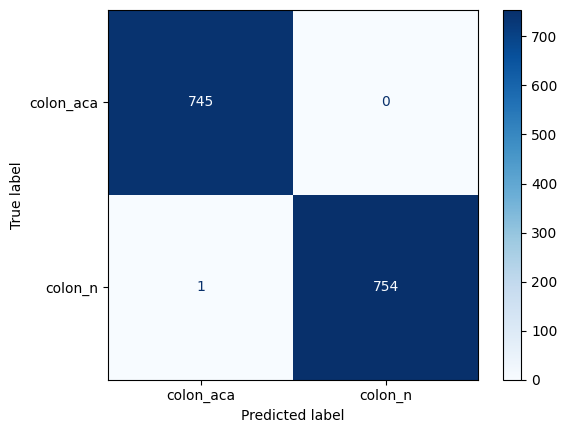

In [ ]:
print_confusion_matrix(ResNet50_model_colon, test_gen_colon)

Classification report of the model with f1 score.

In [ ]:
print(classification_report(test_gen_colon.classes, np.argmax(ResNet50_model_colon.predict(test_gen_colon), axis=1), target_names= list(test_gen_colon.class_indices.keys())))

47/47 [==============================] - 7s 157ms/step
              precision    recall  f1-score   support

   colon_aca       1.00      1.00      1.00       745
     colon_n       1.00      1.00      1.00       755

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500
